# Identifying clients likely to revoke service subscriptions



## Classification Modeling with the Churn Telecom's Dataset

# 1. Business and Data Understanding

   In this project, the goal is to identify customers churn, that is, customers most likely to cancel subscription to a SyriaTel Telecom company.And provide recommendations to the stakeholders-Telecom company that will direct them toward such customers, providing adequate intervention to encourage them to stay and minimize customer exit
   
   
   
   The dataset for this exercise relates features of account and usage for churn and non churn clients. The Telecom dataset was obtained from Kaggle. . Since this is a supervised classification problem, machine learning algorithms will be utilized to create predictive models and assess their performance and accuracy. It aims to identify the business model that is the best suitable to solve this problem

# 2.Data Preparation

Using visual and quantitative techniques, we will evaluate datasets to identify and summarize their key features.

In [70]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 2.0 Exploratory Data Analysis (EDA)

### 2.1 Load Data



In [71]:
# load csv
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')



In [72]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [73]:
# separate features and target (churn)for analysis

#features
features = df.drop(columns = "churn",axis=1)


#target
target = df[['churn']]

### 2.2 Multivariate Analysis of the Features

In [25]:
# describe the characteristics of vthe features
features.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


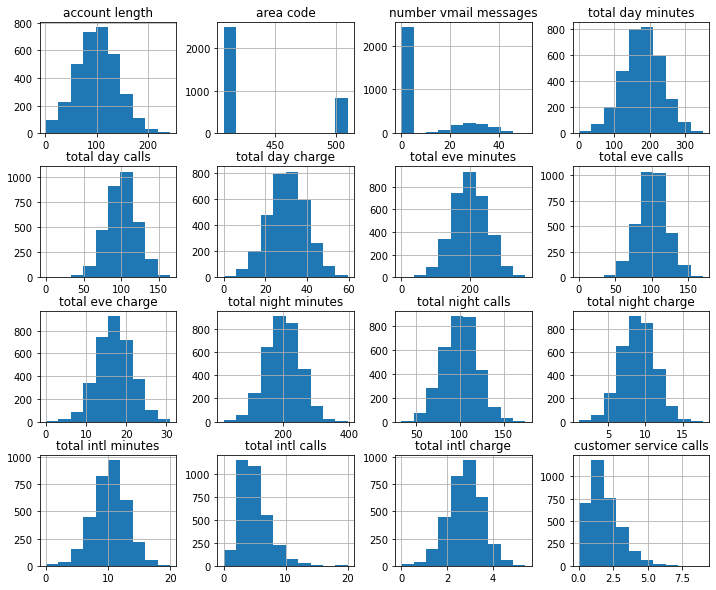

In [26]:
# analysis of the dispersion of the features
features.hist(figsize=(12, 10))
plt.show()

#### Conclusion from distribution of features:

* Most of the variables of dataset are normally distributed.

### 2.3 Univariate Analysis of the Churn Distribution

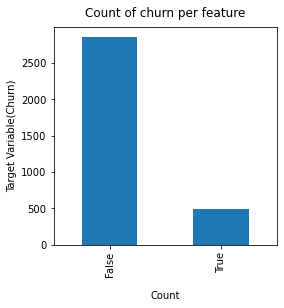

Raw Counts
False    2850
True      483
Name: churn, dtype: int64

Percentages
False    0.855086
True     0.144914
Name: churn, dtype: float64


In [27]:
#overview of the churn 
df['churn'].value_counts().plot(kind='bar', figsize=(4, 4))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable(Churn)")
plt.title("Count of churn per feature", y=1.02)
plt.show()

print("Raw Counts")
print(df["churn"].value_counts())
print()
print("Percentages")
print(df["churn"].value_counts(normalize=True))


#### Conclusion from Churn Distribution:
- Churn has two categories which include True and False values. (True = Customer who churned, False = Customers who were retained).
- There are about 85% of customers who churn, and about 14 customers who are loyal.
- We can clearly see that our data is highly imbalanced. The occurance of False is higher than True.


### 2.31 Churn in accordance with state

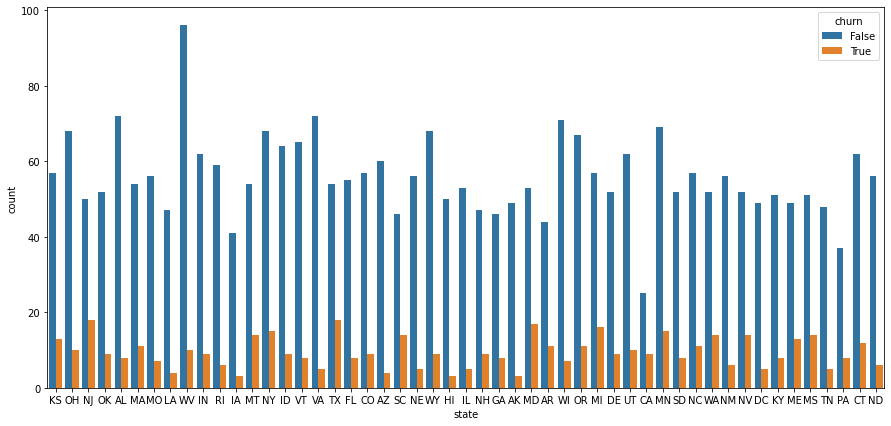

In [28]:
# Plotting a countplot showing state wise churn of customers
plt.figure(figsize=(15,7))
sns.countplot(x=df['state'],hue=df['churn'],);

In [29]:
#Top 3 states with highest customer churn
df[df['churn']==True].groupby('state')['churn'].count().sort_values(ascending=False)[:4].reset_index()


,state,churn
0,TX,18
1,NJ,18
2,MD,17
3,MI,16


In [30]:
#States with lowest customer churn
df[df['churn']==True].groupby('state')['churn'].count().sort_values(ascending=True)[:4].reset_index()

,state,churn
0,AK,3
1,IA,3
2,HI,3
3,AZ,4


##### Conclusion:
- The  top 2 states with the highest churn rate are TX and NJ  with a churn rate of 18
- The  top 3 states with the lowest churn rate are AK,IA and HI  with a churn rate of 3


### 2.33 Churn in accordance to area

In [31]:
#Value counts of column 'Area code'
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

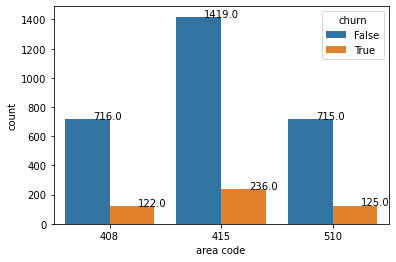

In [32]:
#Plotting a countplot showing Area Wise Churn Analysis
ax = sns.countplot(x='area code',hue='churn',data=df)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

##### Conclusion:
- Most of the churned customers are from 415 area.
- While Area codes 408 and 510 had comparatively less churned customers.


### 2.34 Churn in accordance with the international plan

In [33]:
#Value counts of International plan column
df['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

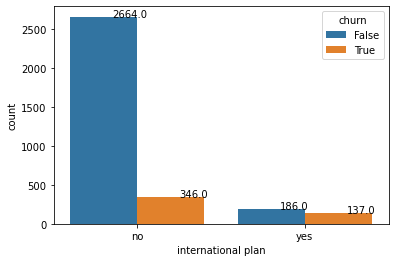

In [34]:
#Plotting a countplot showing Churn according to International plan
ax = sns.countplot(x = 'international plan', hue = 'churn', data = df)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

In [35]:
#Churn percentage of customers who dont have International plan
print('% of customers who are loyal on the International plan is',346*100/3010)

#Churn percentage of customers who  have International plan.
print('% of customers who churn on the International plan is',137*100/323)

% of customers who are loyal on the International plan is 11.49501661129568
% of customers who churn on the International plan is 42.414860681114554


##### Conclusion:
- Churn rate is more with customer using international plan.
- Customers with International plan have about 42% Churn rate.
- While customers who don't have International plan have about 11% Churn rate.
- It is possible that the international plans might not be attractive for customers.


### 2.35 Churn in accordance with voice mail plan

In [36]:
#Value counts of Voice mail plan
df['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

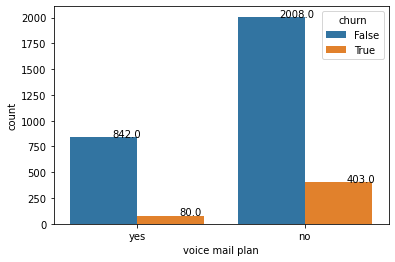

In [37]:
#plottting a countplot of Churn according to Voicemail plan
ax= sns.countplot(x='voice mail plan',hue='churn',data=df)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

In [38]:
#Churn rate of customer without Voice mail plan

#Churn rate = number of Churned customer / total number of customers with voice mail plan
print('Churn rate of customer that lack voice mail plan is',403*100/2411)

#Churn rate of customer with Voice mail plan

#Churn rate = number of Churned customer / total number of customers with voice mail plan
print('Churn rate of customer with voice mail plan is',80*100/922)


Churn rate of customer that lack voice mail plan is 16.715055993363748
Churn rate of customer with voice mail plan is 8.676789587852495


##### Conclusion:
- Churn rate of customer that lack voice mail plan is 16%
- Churn rate of customer with voice mail plan is 8%
- Voice mail plan seems to be loved more among customers

### 2.36 Churn in accordance with charges

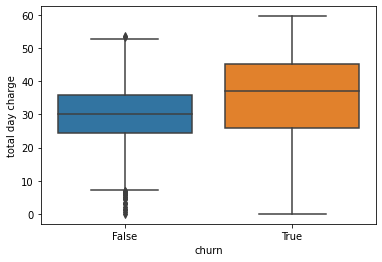

In [39]:
#plotting Box plot showing how Total day charge has an impact on Churn
sns.boxplot(x='churn',y='total day charge', data = df);

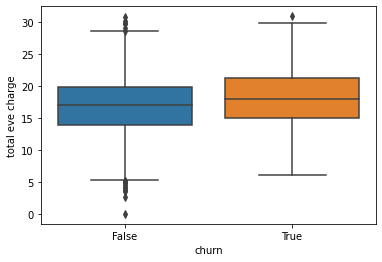

In [40]:
#plotting Box plot showing how Total eveining charge has an impact on Churn
sns.boxplot(x='churn',y='total eve charge', data = df);

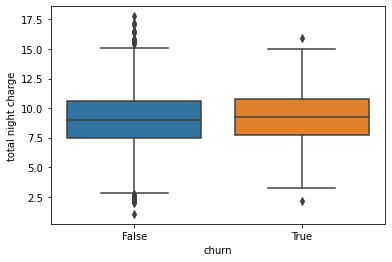

In [41]:
#plotting Box plot showing how Total night charge has an impact on Churn
sns.boxplot(x='churn',y='total night charge', data = df);

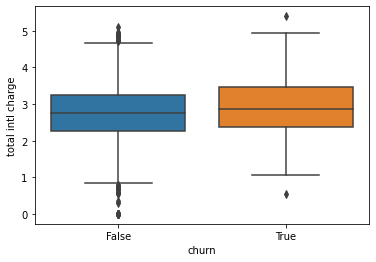

In [42]:
#plotting Box plot showing how Total international charge has an impact on Churn
sns.boxplot(x='churn',y='total intl charge', data = df);

In [43]:
df[['total day charge','total eve charge','total night charge','total intl charge']].describe()

,total day charge,total eve charge,total night charge,total intl charge
count,3333.000000,3333.000000,3333.000000,3333.000000
mean,30.562307,17.083540,9.039325,2.764581
std,9.259435,4.310668,2.275873,0.753773
min,0.000000,0.000000,1.040000,0.000000
25%,24.430000,14.160000,7.520000,2.300000
50%,30.500000,17.120000,9.050000,2.780000
75%,36.790000,20.000000,10.590000,3.270000
max,59.640000,30.910000,17.770000,5.400000


From above plots we can conclude that:

- Charges for the day time calls are way higher than that of Evening and Night.
- Day time call charges is a significant reason to leading to customer Churn.

### 2.4 Relationship between Minutes and Charge.

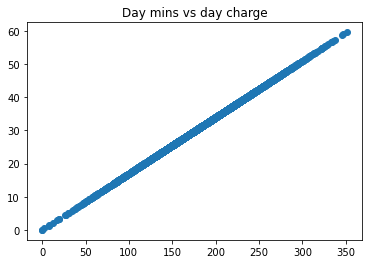

In [44]:
#scatter plot between Total day minutes and Total day charge
plt.scatter(x=df['total day minutes'], y=df['total day charge'])
plt.title('Day mins vs day charge');

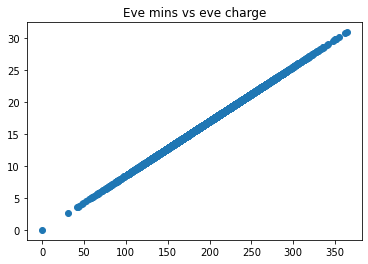

In [45]:
#scatter plot between Total eve minutes and Total eve charge
plt.scatter(x=df['total eve minutes'], y=df['total eve charge'])
plt.title('Eve mins vs eve charge');

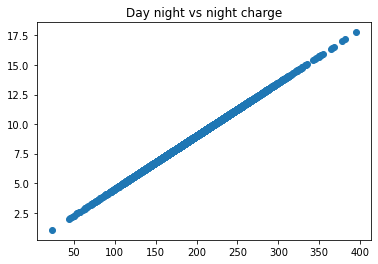

In [46]:
#scatter plot between Total night minutes and Total night charge
plt.scatter(x=df['total night minutes'], y=df['total night charge'])
plt.title('Day night vs night charge');

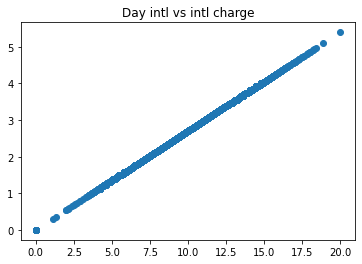

In [47]:
#scatter plot between Total intl minutes and Total intl charge
plt.scatter(x=df['total intl minutes'], y=df['total intl charge'])
plt.title('Day intl vs intl charge');

##### Conclusion:
- There is a linear relationship between minutes and charges irrespective of its time of day or night
- There is a linear relationship between international minutes and international charges
- Day-time call rates are significantly higher than evening and night-time rates.


### 2.5 Correlation heatmap

A correlation matrix describing the correlation between the different features in the dataset.

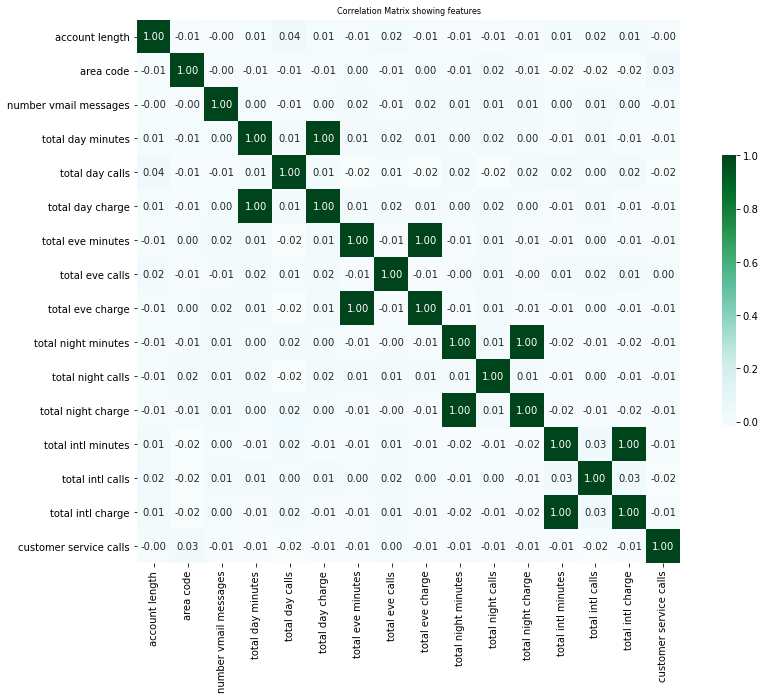

In [48]:
correlation_matrix = features.corr()
plt.figure(figsize=(15, 10))
ax = sns.heatmap(
    correlation_matrix,
    vmax=1,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='BuGn',
    cbar_kws={"shrink": .5},
    robust=True)
plt.title('Correlation Matrix showing features', fontsize=8);

From the result of this Correlation Matrix,these features are highly correlated
#### Heatmap analysis
- ‘Total day minutes’ and ‘total day charges’ are highly correlated.
- ‘Total eve minutes’ and ‘total eve charges’ are highly correlated.

- ‘Total night minutes’ and ‘total night charges’ are highly correlated.

- ‘Total intl minutes’ and ‘total intl charges’ are highly correlated.

I will not drop either for now,for the sake of analysis




## 2.0 Data Preparation for Modeling

### 2.1 Strip off redundant code
Here we drop the ID columns ie (area code and phone number) since they will not be relevant to the analysis

In [49]:
features.drop(["area code","phone number"], axis = 1, inplace = True)


### 2.2 Label Encoding - Categorical Columns


In [50]:
#first we check for the categorical columns in the features
features.dtypes

state                      object
account length              int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
dtype: object

In [51]:
#the categorical variables are state,international plan and voice mail plan
# import discrete value encoder
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

In [52]:
#fit and transform the categorical columns in features using the encoder
features['state'] = label_encoder.fit_transform(features['state'])
features['international plan'] = label_encoder.fit_transform(features['international plan'])
features['voice mail plan'] = label_encoder.fit_transform(features['voice mail plan'])

In [53]:
#check if it worked
features.dtypes

state                       int32
account length              int64
international plan          int32
voice mail plan             int32
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
dtype: object

### 2.3 Features Importance

Feature selection process of finding and selecting the most useful features in a dataset. Unnecessary features decrease training speed, the model interpretability and the generalization performance on the test set. 

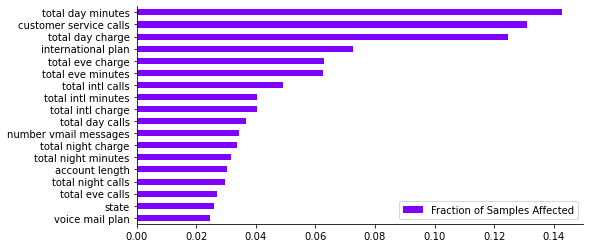

In [54]:
# #import libabry
from sklearn.model_selection import train_test_split
# split dataset into random train and test subsets - random_state is the seed used by the random number generator
X_train, X_test, y_train, y_test = train_test_split(
     features, target, test_size=0.3, random_state=42,stratify=target)

 #import classifier
from sklearn.ensemble import RandomForestClassifier

 # Random Forest Model
rf = RandomForestClassifier()

 # fit the model on your training data
rf.fit(X_train, y_train.values.ravel())

# plot the feature importance
feat_scores = pd.DataFrame(
{
        'Fraction of Samples Affected': rf.feature_importances_
},
   index=features.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh', figsize=(8, 4), colormap='rainbow')
sns.despine()

According to the feature importance analysis produced by the Random Forest algorithm, the following features had the highest predictive power:

1. total day charge
2. total day minutes
3. customer service calls
4. international plan
5. total eve minutes


###  2.4 Build a Feature Matrix

In [55]:
features.columns

Index(['state', 'account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls'],
      dtype='object')

In [56]:
features = features.to_numpy().astype(np.float)
features.shape, features

((3333, 18),
 array([[ 16.  , 128.  ,   0.  , ...,   3.  ,   2.7 ,   1.  ],
        [ 35.  , 107.  ,   0.  , ...,   3.  ,   3.7 ,   1.  ],
        [ 31.  , 137.  ,   0.  , ...,   5.  ,   3.29,   0.  ],
        ...,
        [ 39.  ,  28.  ,   0.  , ...,   6.  ,   3.81,   2.  ],
        [  6.  , 184.  ,   1.  , ...,  10.  ,   1.35,   2.  ],
        [ 42.  ,  74.  ,   0.  , ...,   4.  ,   3.7 ,   0.  ]]))

### 2.41 Changing target variable 

In [57]:
target = target['churn'].to_numpy().astype(np.int)
target.size,target

(3333, array([0, 0, 0, ..., 0, 0, 0]))

This marks the end of the data preparing stage.Here we have
- Stripped off redundant code ie removed columns that we didnt need for modelling of our algorithm
- Label encoded categorical data
- Used feature selection process to list the most useful features in our dataset
-  Built feature matrix of the features and coverted the target to int







# 3.Modeling

In [58]:
# #import library
from sklearn.model_selection import train_test_split
# split dataset into random train and test subsets 
X_train, X_test, y_train, y_test = train_test_split(
     features, target, test_size=0.3, random_state=42,stratify=target)


In [59]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2333, 18), (1000, 18), (2333,), (1000,))

Because the data is imbalanced, I'll oversample the minor class (Churn=True) to make the data more balanced using SMOTE.

In [60]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

In [61]:
X_train_balanced.shape, y_train_balanced.shape


((3990, 18), (3990,))

In [62]:
import collections
collections.Counter(y_train_balanced)

Counter({0: 1995, 1: 1995})

## 3.1 Training and evaluating the models

In [64]:
#Import relevant class and function
from sklearn.ensemble import RandomForestClassifier

#Instantiate the classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=10, criterion='entropy')

#fit classifier on train_balanced subset
rf.fit(X_train_balanced, y_train_balanced)

#use classifier to find the predicted y value of the test subset
y_pred_rfc = rf.predict(X_test)

#import classification metrics
from sklearn.metrics import classification_report, f1_score, roc_auc_score
print(classification_report(y_test, y_pred_rfc))

#metric_result = print(classification_report(y_test, y_pred_baseline_model))
metric_result = pd.DataFrame(data=[['RandomForestClassifier', f1_score(y_test, y_pred_rfc), roc_auc_score(y_test, y_pred_rfc)]], 
                             columns=['algorithm', 'f1_score', 'roc_auc_score'])



              precision    recall  f1-score   support

           0       0.97      0.97      0.97       855
           1       0.82      0.79      0.80       145

    accuracy                           0.94      1000
   macro avg       0.89      0.88      0.89      1000
weighted avg       0.94      0.94      0.94      1000



In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

tree = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=3)
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.1, random_state=1)
ada.fit(X_train_balanced, y_train_balanced)
y_pred_ada = ada.predict(X_test)

print(classification_report(y_test, y_pred_ada))
metric_result.loc[1] = ['AdaBoostClassifier', f1_score(y_test, y_pred_ada), roc_auc_score(y_test, y_pred_ada)]



              precision    recall  f1-score   support

           0       0.95      0.98      0.97       855
           1       0.84      0.72      0.78       145

    accuracy                           0.94      1000
   macro avg       0.90      0.85      0.87      1000
weighted avg       0.94      0.94      0.94      1000



In [66]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(loss='deviance', n_estimators=100, max_depth=4)
gbc.fit(X_train_balanced, y_train_balanced)
y_pred_gbc = gbc.predict(X_test)

print(classification_report(y_test, y_pred_gbc))
metric_result.loc[2] = ['GradientBoostingClassifier', f1_score(y_test, y_pred_gbc), roc_auc_score(y_test, y_pred_gbc)]



              precision    recall  f1-score   support

           0       0.96      0.97      0.97       855
           1       0.83      0.77      0.80       145

    accuracy                           0.94      1000
   macro avg       0.90      0.87      0.88      1000
weighted avg       0.94      0.94      0.94      1000



In [67]:
# Import relevant class and function
from sklearn.linear_model import LogisticRegression


# Instantiate a LogisticRegression with random_state=42
baseline_model = LogisticRegression(random_state=42)

#fit model on train_balanced subset data
baseline_model.fit(X_train_balanced,y_train_balanced)
y_pred_baseline_model = baseline_model.predict(X_test)


from sklearn.metrics import classification_report, f1_score, roc_auc_score

print(classification_report(y_test, y_pred_baseline_model))
metric_result.loc[3] = ['LogisticRegression', f1_score(y_test, y_pred_baseline_model), roc_auc_score(y_test, y_pred_baseline_model)]


              precision    recall  f1-score   support

           0       0.92      0.68      0.78       855
           1       0.26      0.66      0.37       145

    accuracy                           0.68      1000
   macro avg       0.59      0.67      0.58      1000
weighted avg       0.83      0.68      0.72      1000



C:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
metric_result

,algorithm,f1_score,roc_auc_score
0,RandomForestClassifier,0.804196,0.881347
1,AdaBoostClassifier,0.777778,0.850373
2,GradientBoostingClassifier,0.800000,0.872757
3,LogisticRegression,0.373541,0.671385


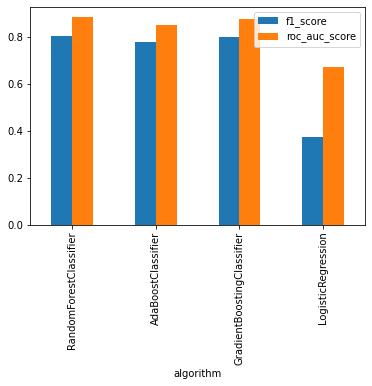

In [69]:
metric_result.plot(x='algorithm', kind='bar');

So, to evaluate if the model works, that is, if it was possible to determine which ones present the highest probability of Churn, I used roc_auc_score. This is one of the most popular metrics for evaluating machine learning models, especially when there are disproportionate classes.

Their respective roc_auc scores are listed below:

* GradientBoostedClassifier:0.87
* RandomForestClassifier:   0.88
* AdaBoostClassifier:       0.85
* Logistic Regression:      0.67

RandomForestClassifier produced the best roc_auc score of 0.88.It is therefore the best model suited for building an algorithm of this problem.

##  3.2 Model Tuning

Since the RandomForestClassifier produced the best roc_auc score and the highest f1 score rates, we will continue with its study. Let's see the errors produced by the model.

### 3.21 Error Analysis

In [221]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    features, target, shuffle=True, test_size=0.3, random_state=42)

# fit Model

model = RandomForestClassifier().fit(X_train_balanced, y_train_balanced)

# R^2 - the best R² possible score is 1.0
print("R²: ", model.score(X_test, y_test))
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("rmse: ", rmse)

R²:  0.987
rmse:  0.11401754250991379


##### Conclusion from the error analysis:
- With an r squared of 0.98,the Random Forest Classification model reveals that 98% of the variability observed in the churn is explained by the model.
- With an rmse of 0.1,which is extreemly low indicates that the Random Forest Classification model is a best fit and accurately  predicts the churn 



# 4. Evaluation

#### From our metrics in the modeling stage:

##### 1.It wasi mportant to use a ML rather than a simpler form of data analysis because with the analysis of the vast amount of data that we had,ML did automate the entire data analysis workflow to provide deeper, faster, and more comprehensive insights. 

##### 2..The RandomForestClassifier had the best roc-auc score of 0.88.This is very good performance as it means that the model is as good as random.The insight we can get from this is that the model by the RandomForestClassifier has the ability to predict the target correctly 88% of the time

##### 3.Limitations in my analysis-The Dataset was imbalanced and therefore couldnt get the highest roc_auc_score of 1

##### 4.Recommendation to guarantee customer retention:
- A good way to lower churn is to lower the prices as the talk time increases.
- Have special offers for those who make more international calls.
- Introduce free voice mail plans
- Promote the service and its products frequently in area 415 area 

# 4. Conclusion

The Random Forest Classifier model did a good job of predicting churn for the SyriaTel Telecom company
    